# Classifying digits using a fully connected neural network

In this practical exercice a fully connected neural network (also called multi-layer perceptron) is built using keras. It is then trained to classify image digits from the MNIST database.

Some baseline results:

| Method                                                                      | Test error (%) |
|-----------------------------------------------------------------------------|---------------:|
| Linear classifier (LeCun et al. 1998)                                       |           12.0 |
| K-nearest-neighbors, Euclidean (L2) (LeCun et al. 1998)                     |            5.0 |
| 3-layer NN, 500-300, softmax, cross entropy, weight decay (Hinton, 2005)    |            1.5 |
| Convolutional net LeNet-4 (LeCun et al. 1998)                               |            1.1 |
| Virtual SVM deg-9 poly [data augmentation] (LeCun et al. 1998)              |            0.8 |
| 6-layer NN with [data augmentation] (Ciresan et al. 2010)                   |           0.35 |
| Deep conv. net, 7 layers [data augmentation] (Ciresan et al. IJCAI 2011)    |           0.35 |

More results are available from: http://yann.lecun.com/exdb/mnist/

Try to improve on some of these results, at least on those that do not use data augmentation or convolutional neural networks.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Run code with tensorflow version 1.x / 2.x
%tensorflow_version 2.x

from tensorflow.keras.datasets import mnist as db
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

# Magic used by the notebook to show figures inline
%matplotlib inline
# matplotlib default values
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading packages
%load_ext autoreload
%autoreload 2


TensorFlow 2.x selected.


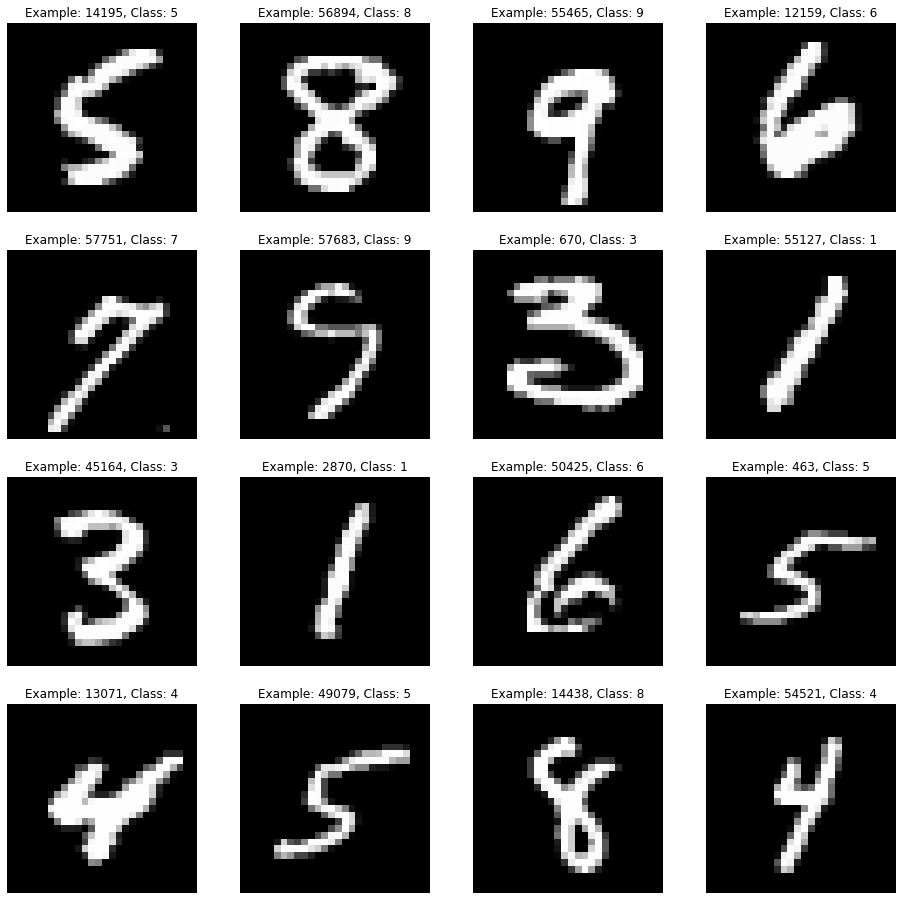

In [0]:
# Load and have a look at the data
(x, y), (x_test_ori, y_test_ori) = db.load_data()

# Visualize a single digit, with its class
plt_r,plt_c = 4,4
f, ax = plt.subplots(plt_r,plt_c, figsize=(16,16))
for i in range(plt_r):
    for j in range(plt_c):
        index = np.random.randint(x.shape[0])
        ax[i][j].imshow(x[index])
        ax[i][j].axis('off')
        ax[i][j].set_title("Example: {}, Class: {}".format(index, y[index]))
plt.show()

# Data preparation

The training subset of the MNIST database contains 60000 images. A fraction of them (6000 by default) will be used for validation; the rest for training.

Note that pixel values are normalized by simply dividing by 255.

In [0]:
# Data management
val_nb = 6000  # number of validation samples
nb_samples = x.shape[0]

if val_nb > nb_samples:
    raise ValueError("You need some samples to train your network!")

img_width, img_height = 28, 28

num_of_pixels = img_width * img_height

x = x.reshape(nb_samples, num_of_pixels)
x_test = x_test_ori.reshape(x_test_ori.shape[0], num_of_pixels)
x = x.astype('float32')
x_test = x_test.astype('float32')
x /= 255
x_test /= 255

x_val = x[:val_nb, ]
x_train = x[val_nb:, ]
y_val = y[:val_nb]
y_train = y[val_nb:]

print(x_train.shape, 'x train samples')
print(x_val.shape, 'x val samples')
print(x_test.shape, 'x test samples')
print(y_train.shape, 'y train samples')
print(y_val.shape, 'y val samples')
print(y_test_ori.shape, 'y test samples')

# convert class vectors to binary class matrices
num_classes = max(y) + 1
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test_ori, num_classes)


(54000, 784) x train samples
(6000, 784) x val samples
(10000, 784) x test samples
(54000,) y train samples
(6000,) y val samples
(10000,) y test samples


# First model

We will begin with a network containing a single hidden layer.


In [0]:
# let define a first simple model without any hidden layers
model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_shape=(x_train.shape[1],)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Model training

The following section takes care of training.

Firstly, the model has to be 'compiled'. This operations lets the user to choose the loss, the optimizer and the metrics, then configures the model for training.

Secondly, the 'fit' method runs the optimization. Training and validation data are specified here, as well as batch size and the number of epochs.


In [0]:
learning_rate = 0.1
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])

Note that you can run the cell below several times. Training will restart from the point it stopped in the previous run. However variable *output* will only contain the history of the last run.

In [0]:
batch_size = 128
epochs = 20
output = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_val, y_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 39us/sample - loss: 0.6056 - accuracy: 0.8468 - val_loss: 0.3933 - val_accuracy: 0.8967
Epoch 2/20
54000/54000 [==============================] - 2s 30us/sample - loss: 0.3847 - accuracy: 0.8949 - val_loss: 0.3416 - val_accuracy: 0.9073
Epoch 3/20
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3511 - accuracy: 0.9030 - val_loss: 0.3204 - val_accuracy: 0.9123
Epoch 4/20
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3333 - accuracy: 0.9067 - val_loss: 0.3081 - val_accuracy: 0.9150
Epoch 5/20
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3221 - accuracy: 0.9103 - val_loss: 0.2995 - val_accuracy: 0.9177
Epoch 6/20
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3138 - accuracy: 0.9124 - val_loss: 0.2936 - val_accuracy: 0.9192
Epoch 7/20
54000/54000 [==============================] -

# Is training satisfactory?

Looking at the evolution of training and validation accuracies, one can evaluate the quality of training.

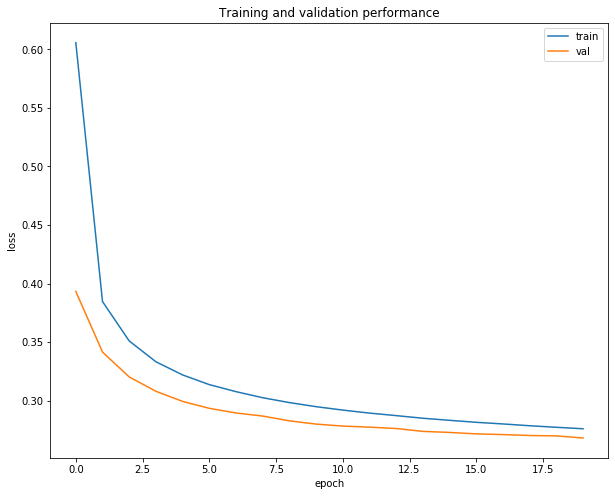

In [0]:
plt.plot(output.epoch, output.history['loss'], label='train')
plt.plot(output.epoch, output.history['val_loss'], label='val')
plt.title('Training and validation performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


# Questions



*   Do you think learning could be improved? Why?

**Answer**: ...

*   Is there overfitting? Why?

**Answer**: ...



# Analysis of the weights

With this simple model it is possible to have an intuition of what the neural network has learned looking at
the matrix of the weights $W$. 
In fact $W\in\mathbb{R}^{784\times 10}$, so for each class $i$ we can plot the weights corresponding to this class.

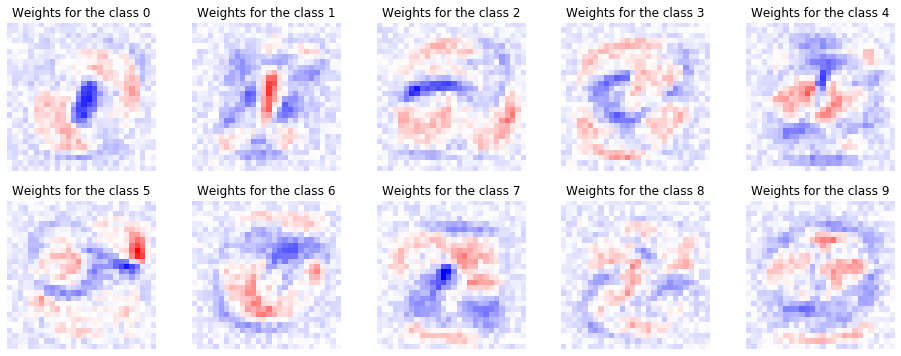

In [0]:
# plotting the weights 
W, b = model.layers[0].get_weights()
vmin = W.min()
vmax = W.max()
f, ax = plt.subplots(2, 5, figsize=(16,6))
for plt_row in range(2):
    for plt_col in range(5):
        ax[plt_row][plt_col].imshow(W[:,plt_row*5 + plt_col].reshape(img_width,img_height), vmin=vmin, vmax=vmax, cmap=plt.cm.bwr)
        ax[plt_row][plt_col].axis('off')
        ax[plt_row][plt_col].set_title("Weights for the class {}".format(plt_row*5 + plt_col))
plt.show()

# Improving performance by adding extra layers

In order to improve the performances of our prediction it is possible to add hidden layers between the input layer and the output layer.

Note that here we are restricted to dense layers. Do not use (yet) other types of layers.

In [0]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax', name="last"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
last (Dense)                 (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
learning_rate = 0.1
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])


In [0]:
batch_size = 128
epochs = 20
output = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_val, y_val),
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 37us/sample - loss: 0.4804 - accuracy: 0.8641 - val_loss: 0.2571 - val_accuracy: 0.9303
Epoch 2/20
54000/54000 [==============================] - 2s 30us/sample - loss: 0.2270 - accuracy: 0.9347 - val_loss: 0.1806 - val_accuracy: 0.9497
Epoch 3/20
54000/54000 [==============================] - 2s 31us/sample - loss: 0.1712 - accuracy: 0.9494 - val_loss: 0.1458 - val_accuracy: 0.9602
Epoch 4/20
54000/54000 [==============================] - 2s 30us/sample - loss: 0.1386 - accuracy: 0.9600 - val_loss: 0.1246 - val_accuracy: 0.9657
Epoch 5/20
54000/54000 [==============================] - 2s 31us/sample - loss: 0.1158 - accuracy: 0.9659 - val_loss: 0.1135 - val_accuracy: 0.9672
Epoch 6/20
54000/54000 [==============================] - 2s 31us/sample - loss: 0.0995 - accuracy: 0.9707 - val_loss: 0.1044 - val_accuracy: 0.9708
Epoch 7/20
54000/54000 [==============================] -

# Analysis of the results




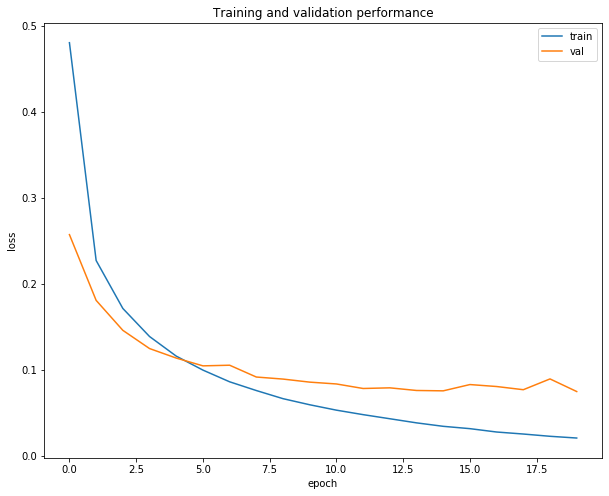

In [0]:
plt.plot(output.epoch, output.history['loss'], label='train')
plt.plot(output.epoch, output.history['val_loss'], label='val')
plt.title('Training and validation performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
# plt.ylim(0.2, 0.8)

Is there overfitting? How can it be reduced?

**Answer**: ...

# Qualitative error analysis

Let us have a look at some images that have been incorrectly classified.

By changing the *index* variable below you can inspect different errors.

Correct label is:  6
Predicted label is:  0
Probabilities:  [5.3890359e-01 3.4326703e-07 5.1428219e-07 4.9930127e-06 1.8215933e-05
 4.5650482e-02 3.9806846e-01 1.6941376e-02 6.4211323e-05 3.4783609e-04]


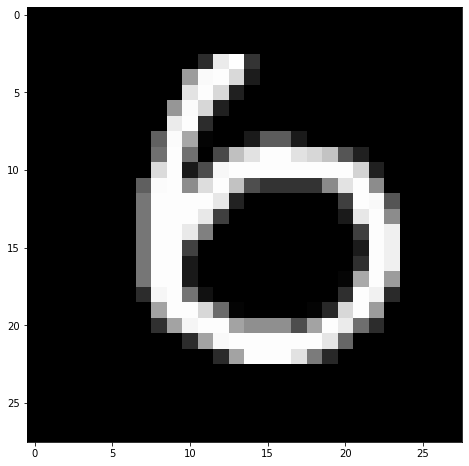

In [0]:
y_predict_proba = model.predict(x_test)
y_predict = np.argmax(y_predict_proba, 1)

diff = y_test_ori != y_predict

x_test_errors = x_test_ori[diff]
y_test_errors = y_test_ori[diff]
y_predict_errors = y_predict[diff]
y_predict_proba_errors = y_predict_proba[diff]

index = 2
print("Correct label is: ", y_test_errors[index])
print("Predicted label is: ", y_predict_errors[index])
print("Probabilities: ", y_predict_proba_errors[index])
plt.imshow(x_test_errors[index], cmap="gray")
plt.show()

Is the network 'confident' when making errors?

**Answer**: ...

What do you think about these errors?

**Answer**: ...

# Analysing the last layer

Each neuron $i$ in the last layer of the network corresponds to one class. Its weights $W_i$ can be interpreted as the parameters of a hyperplane $H_i$ of $R^d$, where $d$ is the number of neurons of the previous layer.

If two classes are correctly separated by the network, one can expect that the two corresponding hyperplanes are orthogonal. This can be evaluated by calculating the cosine similarity between their normal vectors.

Note that as $d$ increases, the expected value of the cosine of two random normal vectors of $R^d$ converges towards zero. Put otherwise: in high dimension, two random vectors tend to be orthogonal.

Shape of the weights array: (128, 10)


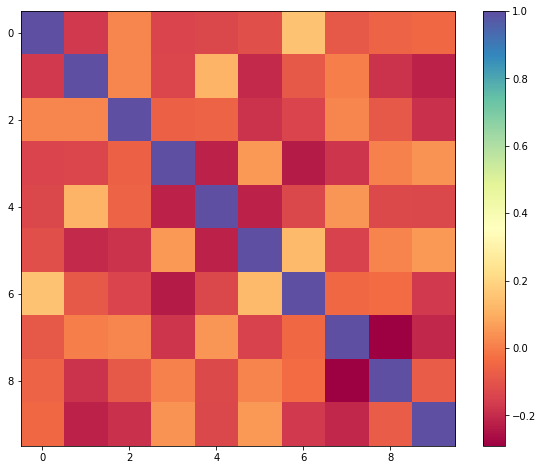

In [0]:
weights, bias = model.get_layer("last").get_weights()
print("Shape of the weights array:", weights.shape)
norms = []
for neuron in range(weights.shape[1]):
    norms += [np.linalg.norm(weights[:,neuron])]
weights /= norms

cos = np.matmul(weights.transpose(), weights)

plt.imshow(cos[0:400, 0:400])
plt.set_cmap('Spectral')
plt.colorbar()
plt.show()

Which classes seem to be the most correlated? Would you have expected this?

**Answer**: ...

# Improving your network

Try to improve the performance of your network: try different numbers of layers, as well as the number of neurons per layer.

What is your best validation accuracy?

**Answer**: ...

# Testing

Testing is the last stage of the learning process. Good practice recommends to do it only once, when you have completely finished with the optimization of the network parameters and hyperparameters.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07172183661600574
Test accuracy: 0.9773


# Confusion matrix

Each value $C_{i,j}$ of the confusion matrix $C$ gives the number of elements known to belong to class $i$ that have been classified in class $j$.

In [0]:
y_pred_proba = model.predict(x_test)
y_pred = y_pred_proba.argmax(axis=-1)

confusion_matrix(y_test_ori, y_pred)

array([[ 970,    1,    1,    0,    0,    1,    2,    1,    3,    1],
       [   0, 1124,    2,    2,    0,    0,    2,    1,    4,    0],
       [   3,    3, 1014,    3,    1,    0,    1,    5,    2,    0],
       [   0,    1,    7,  985,    0,    3,    1,    5,    2,    6],
       [   0,    0,    4,    1,  956,    0,    2,    1,    2,   16],
       [   2,    0,    0,   11,    1,  864,    7,    1,    3,    3],
       [   4,    3,    2,    0,    3,    6,  937,    1,    2,    0],
       [   1,    4,    7,    1,    1,    1,    0, 1001,    3,    9],
       [   5,    0,    3,    7,    2,    8,    2,    4,  938,    5],
       [   2,    2,    0,    9,    4,    2,    1,    4,    1,  984]])

Which pair of classes causes the most confusion? Is the coherent with the analysis of the cosine similarity between neurons of the last layer? Why?

**Answer**: ...

# Experimenting with a more complex database

We will now move to the fashion MNIST database, in order to experiment with a more complex database. The best test accuracy reported on this database is 0.967 (see https://github.com/zalandoresearch/fashion-mnist).



In [0]:
from keras.datasets import fashion_mnist as db

# You can use the following dictionary to transform number labels into meaningfull labels:
fashion_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
    }

print(fashion_dict[2])

Pullover


Using TensorFlow backend.


Build your own model below, train it on the fashion MNIST database and analyse its results. Try to reach the highest validation accuracy. Finally, evaluate it using the test database.

You must respect the following constraints:

* use only dense layers in your nework;

* do not change the optimizer, the loss or the metrics used during training.



In [0]:
# Your code comes here. You can use several cells.

# Your results on the fashion MNIST database

Which pairs of classes are the main cause of confusion?

**Answer**: ...

**Test accuracy**: ...